# **Object Detection and Recognition using YOLO**

# **Model Loading**

In [ ]:
!wget https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-10-14 06:17:25--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg [following]
--2024-10-14 06:17:25--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0s      

2024-10-14 06:17:25 (64.1 MB/s) - ‘yolov3.cfg.1’ saved [8342/8342]

--2024-10-14 06:17:26--  https://pjreddie.com/media/files/yolov3.weig

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the YOLO model
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3.cfg")

# Get the output layer names
layer_names = net.getLayerNames()
# Fix: Directly use the index from getUnconnectedOutLayers without indexing into it
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# **Image Input**

In [ ]:
# Load the image
image_path = '/content/image.jpg'
image = cv2.imread(image_path)
height, width, channels = image.shape

# Prepare the image for YOLO
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# **Object Detection**

In [ ]:
# Perform the forward pass
detections = net.forward(output_layers)

# Define lists to hold the information
class_ids = []
confidences = []
boxes = []

# Loop over each of the detections
for output in detections:
    for detection in output:
        scores = detection[5:]  # Skip the first 5 values (bounding box info)
        class_id = np.argmax(scores)  # Get the class with the highest score
        confidence = scores[class_id]  # Confidence level for that class

        # Filter detections with confidence > 0.5
        if confidence > 0.5:
            # Scale the bounding box back to the original image size
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Calculate the top-left corner of the bounding box
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            # Store bounding box, confidence, and class ID
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply non-maxima suppression to remove overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# **Visualization**

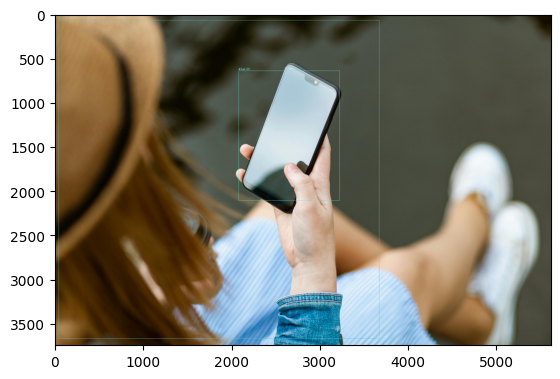

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Create a list of colors for the bounding boxes
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

# Draw the bounding boxes and labels on the image
if len(indices) > 0:
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = str(class_ids[i])  # You can replace with class_labels[class_ids[i]] if you have them
        confidence = confidences[i]
        color = colors[i]

        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

# Display the image with detected objects
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


# **Testing**

Processing image: /content/test1.jpg


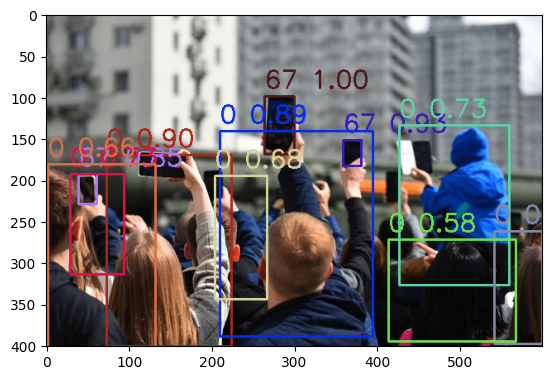

Processing image: /content/test2.jpg


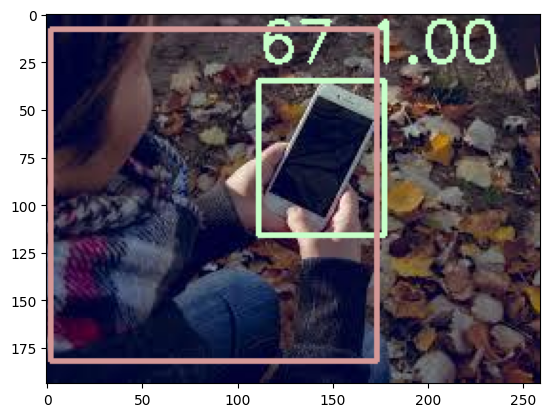

Processing image: /content/test3.jpg


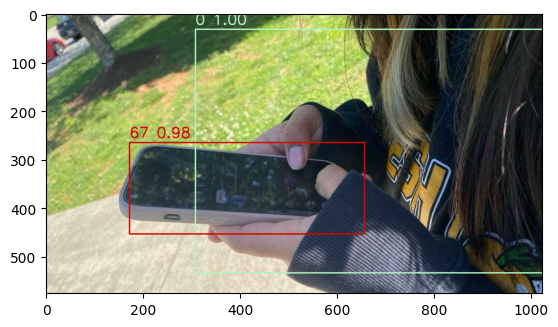

In [ ]:
# prompt: Test the model on at least three different images to compare its performance and
# observe its accuracy. I have a test images 'test1', 'test2', 'test3'

import matplotlib.pyplot as plt
import numpy as np
image_paths = ['/content/test1.jpg', '/content/test2.jpg', '/content/test3.jpg']

for image_path in image_paths:
  print(f"Processing image: {image_path}")

  image = cv2.imread(image_path)
  height, width, channels = image.shape

  blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
  net.setInput(blob)
  detections = net.forward(output_layers)

  class_ids = []
  confidences = []
  boxes = []

  for output in detections:
      for detection in output:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]

          if confidence > 0.5:
              center_x = int(detection[0] * width)
              center_y = int(detection[1] * height)
              w = int(detection[2] * width)
              h = int(detection[3] * height)

              x = int(center_x - w / 2)
              y = int(center_y - h / 2)

              boxes.append([x, y, w, h])
              confidences.append(float(confidence))
              class_ids.append(class_id)

  indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

  colors = np.random.uniform(0, 255, size=(len(boxes), 3))

  if len(indices) > 0:
      for i in indices.flatten():
          x, y, w, h = boxes[i]
          label = str(class_ids[i])
          confidence = confidences[i]
          color = colors[i]

          cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
          cv2.putText(image, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()